In [2]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

# Lab 5 - Yanni vs. Laurel

In this lab, we will use a Butterworth band pass filter to decompose an audio clip that went viral last summer.

## <font color="red"> Task 1 </font>

Listen to the audio clip.  Do you hear *Laurel* or *Yanni*? You will find the clip in `audio/yanni-laurel.wav`.

In [3]:
y, sr = librosa.load('audio/yanni-laurel.wav')

In [4]:
ipd.Audio(y, rate=sr)

Use the tool [in this NY Times article](https://www.nytimes.com/interactive/2018/05/16/upshot/audio-clip-yanny-laurel-debate.html) to play with the signal.  Deter

## <font color="red"> Task 2 - Visualize the Signal</font>

Plot both the wave form and spectrogram of the signal.  Plot the spectrograph on the [mel scale](https://en.wikipedia.org/wiki/Mel_scale) using `scale='mel'` in the call to `showspec`.

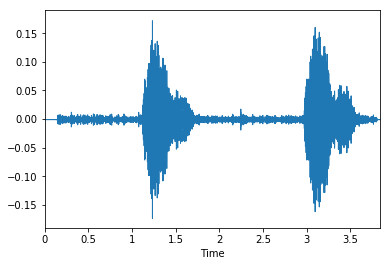

In [9]:
librosa.display.waveplot(y, sr=sr)

In [13]:
def display_mel_spectogram(y, sr):
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

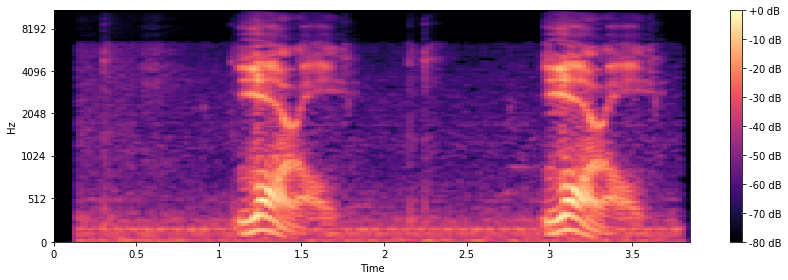

In [14]:
display_mel_spectogram(y, sr)

## <font color="red"> Task 3 - Create Two Filters</font>

Create two Butterworth band pass filters with the following specifications.

* Filter 1
    * lower = 1024
    * upper = 7000
* Filter 2
    * lower = 50
    * upper = 1024
    

In [20]:
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, =order5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [31]:
lowcut = 1024.0
highcut = 7000.0
b1, a1 = butter_bandpass(lowcut, highcut, sr)
w1, h1 = freqz(b1, a1, worN=2000)

In [32]:
lowcut = 50.0
highcut = 1024.0
b2, a2 = butter_bandpass(lowcut, highcut, sr)
w2, h2 = freqz(b2, a2, worN=2000)

Plot each filter in the frequency domain and comment on the effect of applying each filter.

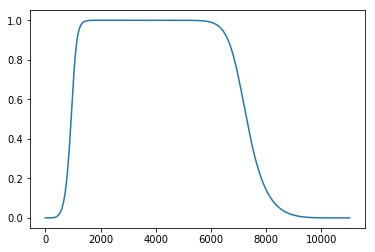

In [33]:
plt.figure(1)
plt.plot((sr * 0.5 / np.pi) * w1, abs(h1))

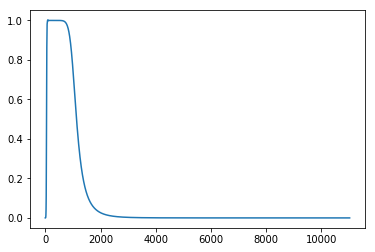

In [34]:
plt.figure(1)
plt.plot((sr * 0.5 / np.pi) * w2, abs(h2))

## <font color="red"> Task 4 - Apply Both Filters</font>

Apply each filter to the `yanni-laurel` clip and listen to the result. For each clip, record whether you heard *Yanni* or *Laurel*

In [36]:
# Now use butter_bandpass_filter to split the signal about the 1024 hz mark
signal_upper = butter_bandpass_filter(y, 1024, 7000, sr)
signal_lower = butter_bandpass_filter(y, 50, 1024, sr)

In [37]:
ipd.Audio(signal_lower, rate=sr)

In [38]:
ipd.Audio(signal_upper, rate=sr)

## <font color="red"> Task 5 - Find Your Personal Critical Point</font>

Play around with the cut point between the two filters and see if you can find your personal 